In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_squared_error

In [3]:
df=pd.read_csv(r"Fiberbits.csv")
df

,active_cust,income,months_on_network,Num_complaints,number_plan_changes,relocated,monthly_bill,technical_issues_per_month,Speed_test_result
0,0,1586,85,6,1,0,42,3,52
1,0,1581,85,6,1,0,66,4,66
2,0,1594,82,4,1,0,36,4,74
3,0,1594,82,5,1,0,37,4,67
4,1,1609,80,10,1,0,85,4,48
...,...,...,...,...,...,...,...,...,...
99995,1,1673,71,9,2,0,46,5,37
99996,1,1667,71,5,2,0,48,4,51
99997,1,1672,71,10,2,0,85,5,21
99998,1,1686,69,5,2,0,34,4,23


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column                      Non-Null Count   Dtype
---  ------                      --------------   -----
 0   active_cust                 100000 non-null  int64
 1   income                      100000 non-null  int64
 2   months_on_network           100000 non-null  int64
 3   Num_complaints              100000 non-null  int64
 4   number_plan_changes         100000 non-null  int64
 5   relocated                   100000 non-null  int64
 6   monthly_bill                100000 non-null  int64
 7   technical_issues_per_month  100000 non-null  int64
 8   Speed_test_result           100000 non-null  int64
dtypes: int64(9)
memory usage: 6.9 MB


In [5]:
 df.duplicated().value_counts()

False    99985
True        15
Name: count, dtype: int64

In [7]:
df.drop_duplicates(inplace=True)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 99985 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   active_cust                 99985 non-null  int64
 1   income                      99985 non-null  int64
 2   months_on_network           99985 non-null  int64
 3   Num_complaints              99985 non-null  int64
 4   number_plan_changes         99985 non-null  int64
 5   relocated                   99985 non-null  int64
 6   monthly_bill                99985 non-null  int64
 7   technical_issues_per_month  99985 non-null  int64
 8   Speed_test_result           99985 non-null  int64
dtypes: int64(9)
memory usage: 7.6 MB


{'whiskers': [<matplotlib.lines.Line2D at 0x1ba130dd150>,
 'caps': [<matplotlib.lines.Line2D at 0x1ba130df590>,
 'boxes': [<matplotlib.lines.Line2D at 0x1ba130dcc50>],
 'medians': [<matplotlib.lines.Line2D at 0x1ba130f03d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1ba130f0f90>],
 'means': []}

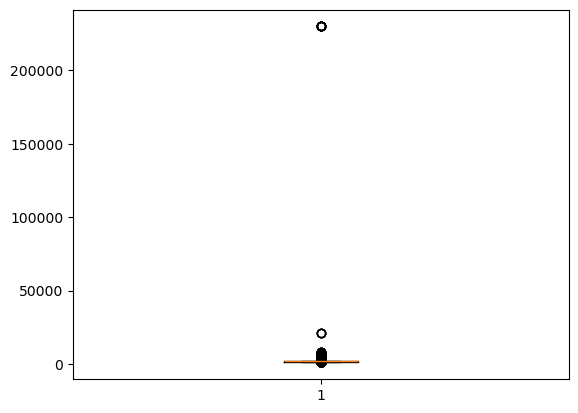

In [9]:
plt.boxplot(df['income'])

In [11]:
for x in df.index:
    if df.loc[x,"income"]>20000:
        df.drop(x,inplace=True)

{'whiskers': [<matplotlib.lines.Line2D at 0x1ba1331cd50>,
 'caps': [<matplotlib.lines.Line2D at 0x1ba1331e210>,
 'boxes': [<matplotlib.lines.Line2D at 0x1ba1331c590>],
 'medians': [<matplotlib.lines.Line2D at 0x1ba1331f350>],
 'fliers': [<matplotlib.lines.Line2D at 0x1ba1331fc50>],
 'means': []}

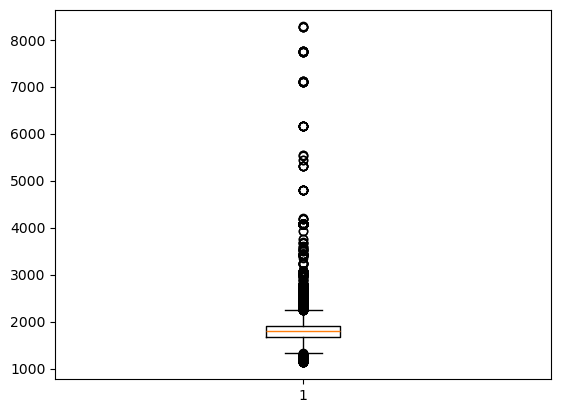

In [12]:
plt.boxplot(df['income'])

In [13]:
x=df.iloc[:,1:]
y=df.iloc[:,0]

In [14]:
df.describe()

,active_cust,income,months_on_network,Num_complaints,number_plan_changes,relocated,monthly_bill,technical_issues_per_month,Speed_test_result
count,99967.000000,99967.000000,99967.000000,99967.000000,99967.000000,99967.000000,99967.000000,99967.000000,99967.000000
mean,0.578501,1822.566287,58.417338,6.013925,1.385517,0.123501,54.887943,3.885582,53.485640
std,0.493802,256.391220,18.616765,2.731315,1.616968,0.329013,26.227377,1.690711,19.174512
min,0.000000,1130.000000,-12.000000,0.000000,0.000000,0.000000,10.000000,2.000000,15.000000
25%,0.000000,1674.000000,47.000000,5.000000,0.000000,0.000000,32.000000,3.000000,40.000000
50%,1.000000,1805.000000,56.000000,6.000000,1.000000,0.000000,55.000000,4.000000,54.000000
75%,1.000000,1907.000000,70.000000,8.000000,2.000000,0.000000,78.000000,5.000000,68.000000
max,1.000000,8281.000000,449.000000,10.000000,9.000000,1.000000,100.000000,12.000000,90.000000


In [15]:
from sklearn import preprocessing
x=preprocessing.StandardScaler().fit(x).transform(x)

In [16]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=1,test_size=0.25)

In [17]:
from sklearn.linear_model import LogisticRegression
LR=LogisticRegression().fit(x_train,y_train)
LR

LogisticRegression()

In [18]:
y_pred=LR.predict(x_test)
y_pred

array([1, 1, 0, ..., 0, 1, 1], dtype=int64)

In [19]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
accuracy_score(y_test,y_pred)

0.8655169654289373

In [20]:
con_matrix=confusion_matrix(y_test,y_pred)
con_matrix

array([[ 8517,  1902],
       [ 1459, 13114]], dtype=int64)

In [21]:
acc=(8541+13099)/(8541+1926+1434+13099)
acc

0.8656

In [22]:
TP=con_matrix[1,1]
TN=con_matrix[0,0]
FP=con_matrix[0,1]
FN=con_matrix[1,0]

In [23]:
Acc=(TP+TN)/(TP+TN+FP+FN)
Acc

0.8655169654289373

In [24]:
Precision=TP/(TP+FP)
Precision

0.8733351092168353

In [25]:
Recall_Sensitivity=TP/(TP+FN)
Recall_Sensitivity

0.899883345913676

In [26]:
import statsmodels.api as sm
sm.Logit(y,x).fit().summary()

Optimization terminated successfully.
         Current function value: 0.301606
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:            active_cust   No. Observations:                99967
Model:                          Logit   Df Residuals:                    99959
Method:                           MLE   Df Model:                            7
Date:                Tue, 23 Apr 2024   Pseudo R-squ.:                  0.5570
Time:                        05:15:56   Log-Likelihood:                -30151.
converged:                       True   LL-Null:                       -68055.
Covariance Type:            nonrobust   LLR p-value:                     0.000
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.3515      0.023     15.278      0.000       0.306       0.397
x2             0.7531      0.022     34.453      0.000       0.710       0.796
x3             2.1625      0.017    125.857      0.000       2.129       2.196
x4            -0.4650      0.037    -12.491      0.000      -0.538      -0.392
x5            -1.0278      0.018    -58.508      0.000      -1.062      -0.993
x6             0.0196      0.010      1.902      0.057      -0.001       0.040
x7            -0.0225      0.035     -0.645      0.519      -0.091       0.046
x8            -1.3477      0.013   -102.506      0.000      -1.373      -1.322
==============================================================================
"""

In [27]:
df.drop('monthly_bill',axis=1,inplace=True)

In [28]:
df.drop('technical_issues_per_month',axis=1,inplace=True)

In [29]:
df

,active_cust,income,months_on_network,Num_complaints,number_plan_changes,relocated,Speed_test_result
0,0,1586,85,6,1,0,52
1,0,1581,85,6,1,0,66
2,0,1594,82,4,1,0,74
3,0,1594,82,5,1,0,67
4,1,1609,80,10,1,0,48
...,...,...,...,...,...,...,...
99995,1,1673,71,9,2,0,37
99996,1,1667,71,5,2,0,51
99997,1,1672,71,10,2,0,21
99998,1,1686,69,5,2,0,23


In [30]:
x=df.iloc[:,1:]
y=df.iloc[:,0]

In [31]:
df.describe()

,active_cust,income,months_on_network,Num_complaints,number_plan_changes,relocated,Speed_test_result
count,99967.000000,99967.000000,99967.000000,99967.000000,99967.000000,99967.000000,99967.000000
mean,0.578501,1822.566287,58.417338,6.013925,1.385517,0.123501,53.485640
std,0.493802,256.391220,18.616765,2.731315,1.616968,0.329013,19.174512
min,0.000000,1130.000000,-12.000000,0.000000,0.000000,0.000000,15.000000
25%,0.000000,1674.000000,47.000000,5.000000,0.000000,0.000000,40.000000
50%,1.000000,1805.000000,56.000000,6.000000,1.000000,0.000000,54.000000
75%,1.000000,1907.000000,70.000000,8.000000,2.000000,0.000000,68.000000
max,1.000000,8281.000000,449.000000,10.000000,9.000000,1.000000,90.000000


In [32]:
from sklearn import preprocessing
x=preprocessing.StandardScaler().fit(x).transform(x)

In [33]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=1,test_size=0.25)

In [34]:
from sklearn.linear_model import LogisticRegression
LR=LogisticRegression().fit(x_train,y_train)
LR

LogisticRegression()

In [35]:
y_pred=LR.predict(x_test)
y_pred

array([1, 1, 0, ..., 0, 1, 1], dtype=int64)

In [36]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
accuracy_score(y_test,y_pred)

0.8653969270166453

In [37]:
con_matrix=confusion_matrix(y_test,y_pred)
con_matrix

array([[ 8513,  1906],
       [ 1458, 13115]], dtype=int64)

In [39]:
LR.predict_proba(x_test)

array([[0.17822432, 0.82177568],
       [0.23175112, 0.76824888],
       [0.95076369, 0.04923631],
       ...,
       [0.97586903, 0.02413097],
       [0.03337713, 0.96662287],
       [0.00453866, 0.99546134]])